<a href="https://colab.research.google.com/github/crsimmons1/lifeexpectancy/blob/master/DataProcessesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

## Overview
The main dataset can be found [here](https://www.kaggle.com/kumarajarshi/life-expectancy-who) on Kaggle. Please see this git [repository](https://github.com/crsimmons1/lifeexpectancy) for more information on the models this was used for. 

Columns were renamed as shown in bold in the data dictionary for ease of use. No duplicate rows were found. Then, the cardinality and missing values were assessed. Any of the rows with missing values in either target variable were removed. There were 7 variables with more than 5% missing values, so any row with more than 3 missing values was removed so that only 3 variables had many missing values (Population, GDP, and Hepatitis B). 

### Data Dictionary 
The variables in the dataset are:
* **Country**
* **Year**
* **Status** Developed or Developing status
* **LifeExpectancy** in age
* **AdultMortality** Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* **InfantDeaths** Number of Infant Deaths per 1,000 population
* **Alcohol**, recorded per capita (15+) consumption (in litres of pure alcohol)
* **Expenditure** on health as a percentage of Gross Domestic Product per capita(%)
* Hepatitis B (**HepB**) immunization coverage among 1-year-olds (%)
* **Measles** - number of reported cases per 1000 population
* **BMI** Average Body Mass Index of entire population
* **5deaths** Number of under-five deaths per 1000 population
* **Polio** (Pol3) immunization coverage among 1-year-olds (%)
* **TExpentidure** - Total Expenditure - General government expenditure on health as a percentage of total government expenditure (%)
* **Diphtheria** tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* **HIV** Deaths per 1,000 live births HIV/AIDS (0-4 years)
* **GDP** Gross Domestic Product per capita (in USD)
* **Population** of the country
* **ThinJuvenile** Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* **ThinChild** Prevalence of thinness among children for Age 5 to 9(%)
* **IncomeComp** Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* **Schooling** Number of years of Schooling(years)

### Import Data

In [0]:
import pandas as pd
import numpy as np

# Main data set
df = pd.read_csv("LifeExpectancyData.csv")

In [285]:
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [286]:
df.shape

(2938, 22)

## Data Cleaning
### The Basics: Missing/Duplicated Values, Cardinality, Summary Statistics

In [287]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [0]:
#Rename Columns
df = df.rename(columns={'Life expectancy ': "LifeExpectancy", "Adult Mortality": "AdultMortality", "infant deaths": "InfantDeaths", "percentage expenditure": "Expenditure",
                          "Hepatitis B": "HepB", "Measles ": "Measles" , " BMI ": "BMI", "under-five deaths ": "5deaths",
                         "Total expenditure": "TExpenditure", "Diphtheria ": "Diphtheria", " HIV/AIDS":"HIV", " thinness  1-19 years":"ThinJuvenile",
                         " thinness 5-9 years":"ThinChild", "Income composition of resources":"IncomeComp"})

In [289]:
#Check for duplicates
df[df.duplicated()].shape

(0, 22)

In [290]:
#Check Cardinality 
def cardinality_categorical(df):
    n_records = len(df)
    for column in df.select_dtypes([object]):
        print("{} | uniques/records: {:.3f} | Minimum observations: {:.3f}".format(
            column, 
            len(df[column].unique())/n_records,
            df[column].value_counts().min()
        ))        

cardinality_categorical(df)

Country | uniques/records: 0.066 | Minimum observations: 1.000
Status | uniques/records: 0.001 | Minimum observations: 512.000


In [291]:
n_records = len(df)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(df)

Country | 0.0 | object
Year | 0.0 | int64
Status | 0.0 | object
LifeExpectancy | 0.0034036759700476512 | float64
AdultMortality | 0.0034036759700476512 | float64
InfantDeaths | 0.0 | int64
Alcohol | 0.06603131381892444 | float64
Expenditure | 0.0 | float64
HepB | 0.18822328114363512 | float64
Measles | 0.0 | int64
BMI | 0.011572498298162015 | float64
5deaths | 0.0 | int64
Polio | 0.006466984343090538 | float64
TExpenditure | 0.07692307692307693 | float64
Diphtheria | 0.006466984343090538 | float64
HIV | 0.0 | float64
GDP | 0.1524846834581348 | float64
Population | 0.22191967324710687 | float64
ThinJuvenile | 0.011572498298162015 | float64
ThinChild | 0.011572498298162015 | float64
IncomeComp | 0.056841388699795777 | float64
Schooling | 0.05547991831177672 | float64


### Deal with Missing Values

Any of the rows with missing values in either target variable were removed. Here the most problematic columns are those with more than 5% missing values. This includes 
* Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Total Expenditure - General government expenditure on health as a percentage of total government expenditure (%)
* Gross Domestic Product per capita (in USD)
* Population of the country
* Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Number of years of Schooling(years)

In [0]:
data = df.dropna(subset=['LifeExpectancy', 'TExpenditure'])

In [293]:
# Create a column that counts the number of NaN values in each row 
data['NAcount'] = 23 - data.apply(lambda x: x.count(), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [294]:
data.describe()

,Year,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,Expenditure,HepB,Measles,BMI,5deaths,Polio,TExpenditure,Diphtheria,HIV,GDP,Population,ThinJuvenile,ThinChild,IncomeComp,Schooling,NAcount
count,2702.000000,2702.000000,2702.000000,2702.000000,2698.000000,2702.000000,2186.000000,2702.000000,2684.000000,2702.000000,2694.000000,2702.000000,2694.000000,2702.000000,2327.000000,2.129000e+03,2684.000000,2684.000000,2582.000000,2582.000000,2702.000000
mean,2007.019245,69.225241,164.035159,30.868986,4.651164,802.242942,80.861391,2496.242043,38.135730,42.837528,82.730141,5.930163,82.502598,1.827276,7527.272406,1.291468e+07,4.857116,4.888897,0.625876,11.995198,1.658031
std,4.325133,9.529783,125.449152,120.993881,4.055951,2060.527185,25.112242,11768.607783,19.883644,164.872326,23.085424,2.483273,23.509528,5.270613,14447.907332,6.277521e+07,4.469598,4.560112,0.210223,3.277329,1.070285
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,1.000000
25%,2003.000000,63.200000,73.000000,0.000000,0.952500,11.908341,77.000000,0.000000,19.000000,0.000000,78.000000,4.260000,78.000000,0.100000,454.244439,1.923120e+05,1.600000,1.500000,0.491000,10.100000,1.000000
50%,2007.000000,72.100000,142.500000,3.000000,3.830000,87.786552,92.000000,18.000000,43.600000,4.000000,93.000000,5.750000,93.000000,0.100000,1726.915100,1.359647e+06,3.300000,3.300000,0.675000,12.300000,1.000000
75%,2011.000000,75.600000,226.750000,21.000000,7.807500,503.469045,97.000000,374.500000,55.900000,26.000000,97.000000,7.490000,97.000000,0.800000,5858.718311,7.284753e+06,7.200000,7.300000,0.777750,14.200000,2.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.100000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.945000,20.700000,6.000000


In [0]:
# Subset to the rows with max of 3 missing values
data= data[data['NAcount'] <= 3]

In [296]:
# Drop unneeded column 
data = data.drop(columns='NAcount')
data.shape

(2532, 22)

In [297]:
missing_values_df(data)

Country | 0.0 | object
Year | 0.0 | int64
Status | 0.0 | object
LifeExpectancy | 0.0 | float64
AdultMortality | 0.0 | float64
InfantDeaths | 0.0 | int64
Alcohol | 0.0 | float64
Expenditure | 0.0 | float64
HepB | 0.15282505105513955 | float64
Measles | 0.0 | int64
BMI | 0.0 | float64
5deaths | 0.0 | int64
Polio | 0.0 | float64
TExpenditure | 0.0 | float64
Diphtheria | 0.0 | float64
HIV | 0.0 | float64
GDP | 0.07862491490810075 | float64
Population | 0.14601769911504425 | float64
ThinJuvenile | 0.0 | float64
ThinChild | 0.0 | float64
IncomeComp | 0.0 | float64
Schooling | 0.0 | float64


Examine the null value counts for several countries in the worrisome categories. Most of the missing values now come from countries that are either entirely missing Hepatitus B, Population, or GDP variables in most or all of the years. 

In [298]:
df2 = data.HepB.isnull().groupby([data['Country']]).sum().astype(int).reset_index(name='HepB_NA')
df3= data.GDP.isnull().groupby([data['Country']]).sum().astype(int).reset_index(name='GDPNAcount')
df4= data.Population.isnull().groupby([data['Country']]).sum().astype(int).reset_index(name='Popcount')
df2['NA_GDP'] = df3['GDPNAcount']
df2['NA_Pop'] = df4['Popcount']
df2['Sum'] = df2['HepB_NA'] + df2['NA_GDP'] + df2['NA_Pop']

df2[df2.Sum > 20]

,Country,HepB_NA,NA_GDP,NA_Pop,Sum
10,Bahamas,0,14,14,28
19,Bolivia (Plurinational State of),0,15,15,30
46,Egypt,0,15,15,30
56,Gambia,0,15,15,30
72,Iran (Islamic Republic of),0,15,15,30
84,Kyrgyzstan,0,15,15,30
85,Lao People's Democratic Republic,0,12,12,24
102,Micronesia (Federated States of),0,15,15,30
129,Saint Lucia,0,13,13,26
130,Saint Vincent and the Grenadines,0,12,12,24


### Correlation Plot

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
cont_vars = list(data.columns)[3:]

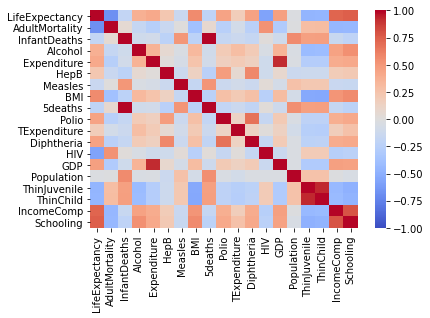

In [301]:
sns.heatmap(data[cont_vars].corr(), annot=False, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm')

## Impute Missing Values

In [0]:
from sklearn.pipeline import Pipeline 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#NUMERIC PIPELINE: 
numeric_pipe = Pipeline(
    [('imputer', IterativeImputer(max_iter=15, random_state=0))])

In [0]:
#CATEGORICAL PIPELINE
from sklearn.impute import SimpleImputer
categorical_pipe = Pipeline(
    [('cat_imputer', SimpleImputer(strategy = 'most_frequent'))])

In [0]:
# Categorical Columns
categorical = data.select_dtypes(include=['object']).columns

# Numeric Columns to train
numeric = data.select_dtypes(include=['int64', 'float64']).columns

In [0]:
from sklearn.compose import ColumnTransformer

full_transformer = ColumnTransformer(
    transformers = [
        ('categorical', categorical_pipe, categorical),
        ('numeric', numeric_pipe, numeric)
    ]
)

In [0]:
data_processed = full_transformer.fit_transform(data)

In [0]:
cols = ['Country', 'Status', 'Year','LifeExpectancy', 'AdultMortality',
       'InfantDeaths', 'Alcohol', 'Expenditure', 'HepB', 'Measles', 'BMI',
       '5deaths', 'Polio', 'TExpenditure', 'Diphtheria', 'HIV', 'GDP',
       'Population', 'ThinJuvenile', 'ThinChild', 'IncomeComp', 'Schooling']

In [308]:
data_processed = pd.DataFrame(data_processed, columns=cols)
data_processed.head(5)

,Country,Status,Year,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,Expenditure,HepB,Measles,BMI,5deaths,Polio,TExpenditure,Diphtheria,HIV,GDP,Population,ThinJuvenile,ThinChild,IncomeComp,Schooling
0,Afghanistan,Developing,2015,65,263,62,0.01,71.2796,65,1154,19.1,83,6,8.16,65,0.1,584.259,3.37365e+07,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,2014,59.9,271,64,0.01,73.5236,62,492,18.6,86,58,8.18,62,0.1,612.697,327582,17.5,17.5,0.476,10
2,Afghanistan,Developing,2013,59.9,268,66,0.01,73.2192,64,430,18.1,89,62,8.13,64,0.1,631.745,3.17317e+07,17.7,17.7,0.47,9.9
3,Afghanistan,Developing,2012,59.5,272,69,0.01,78.1842,67,2787,17.6,93,67,8.52,67,0.1,669.959,3.69696e+06,17.9,18,0.463,9.8
4,Afghanistan,Developing,2011,59.2,275,71,0.01,7.09711,68,3013,17.2,97,68,7.87,68,0.1,63.5372,2.9786e+06,18.2,18.2,0.454,9.5


In [310]:
# Verify that it worked
missing_values_df(data_processed)

Country | 0.0 | object
Status | 0.0 | object
Year | 0.0 | object
LifeExpectancy | 0.0 | object
AdultMortality | 0.0 | object
InfantDeaths | 0.0 | object
Alcohol | 0.0 | object
Expenditure | 0.0 | object
HepB | 0.0 | object
Measles | 0.0 | object
BMI | 0.0 | object
5deaths | 0.0 | object
Polio | 0.0 | object
TExpenditure | 0.0 | object
Diphtheria | 0.0 | object
HIV | 0.0 | object
GDP | 0.0 | object
Population | 0.0 | object
ThinJuvenile | 0.0 | object
ThinChild | 0.0 | object
IncomeComp | 0.0 | object
Schooling | 0.0 | object


In [0]:
data_processed= data_processed.drop(columns='Country')

In [0]:
# Create a categorical response variable from Total Expenditure (1 is high, 0 is low)
def classifyexp(exp):
    if ((exp >= 0) and (exp <=5.8)):
        return 0
    elif ((exp > 5.8) and (exp <= 15)):
        return 1

data_processed['TExp'] = data_processed['TExpenditure'].apply(classifyexp)


In [0]:
d_map = {'Developed':1, 'Developing':0}
data_processed['Status'] = data_processed['Status'].map(d_map)


In [314]:
data_processed

,Status,Year,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,Expenditure,HepB,Measles,BMI,5deaths,Polio,TExpenditure,Diphtheria,HIV,GDP,Population,ThinJuvenile,ThinChild,IncomeComp,Schooling,TExp
0,0,2015,65,263,62,0.01,71.2796,65,1154,19.1,83,6,8.16,65,0.1,584.259,3.37365e+07,17.2,17.3,0.479,10.1,1
1,0,2014,59.9,271,64,0.01,73.5236,62,492,18.6,86,58,8.18,62,0.1,612.697,327582,17.5,17.5,0.476,10,1
2,0,2013,59.9,268,66,0.01,73.2192,64,430,18.1,89,62,8.13,64,0.1,631.745,3.17317e+07,17.7,17.7,0.47,9.9,1
3,0,2012,59.5,272,69,0.01,78.1842,67,2787,17.6,93,67,8.52,67,0.1,669.959,3.69696e+06,17.9,18,0.463,9.8,1
4,0,2011,59.2,275,71,0.01,7.09711,68,3013,17.2,97,68,7.87,68,0.1,63.5372,2.9786e+06,18.2,18.2,0.454,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,0,2004,44.3,723,27,4.36,0,68,31,27.1,42,67,7.13,65,33.6,454.367,1.27775e+07,9.4,9.4,0.407,9.2,1
2528,0,2003,44.5,715,26,4.06,0,7,998,26.7,41,7,6.52,68,36.7,453.351,1.26339e+07,9.8,9.9,0.418,9.5,1
2529,0,2002,44.8,73,25,4.43,0,73,304,26.3,40,73,6.53,71,39.8,57.3483,125525,1.2,1.3,0.427,10,1
2530,0,2001,45.3,686,25,1.72,0,76,529,25.9,39,76,6.16,75,42.1,548.587,1.23662e+07,1.6,1.7,0.427,9.8,1


In [0]:
# Export the csv
data_processed.to_csv(r'cleaned_data.csv', index = None, header=True)
